# Autoencoders

# **Compresión de datos**

La compresión de datos es una fase esencial en el entrenamiento de una red. 

La idea es comprimir los datos para que que la misma cantidad de información puede representarse con menos bits.

**Codificador automático (Auto Encoder (AE)**

Autoencoder se usa para aprender incrustaciones eficientes de datos sin etiquetar para una configuración de red determinada. 

Consta de dos partes, un **codificador y un decodificador**

**El codificador** comprime los datos de un espacio de mayor dimensión a un espacio de menor dimensión (también
llamado espacio latente), mientras que el **decodificador** vuelve a convertir el espacio latente en un espacio de mayor dimensión.

Toda la arquitectura de codificador-decodificador se entrena colectivamente en la función de pérdida que fomenta que la entrada se reconstruya en la salida. Por lo tanto, la función de pérdida es el error cuadrático medio
entre la entrada del codificador y la salida del decodificador.

La variable latente no está regularizada. Elegir una variable latente aleatoria generará una salida de basura.

La variable latente son valores deterministas y el espacio carece de la capacidad generativa

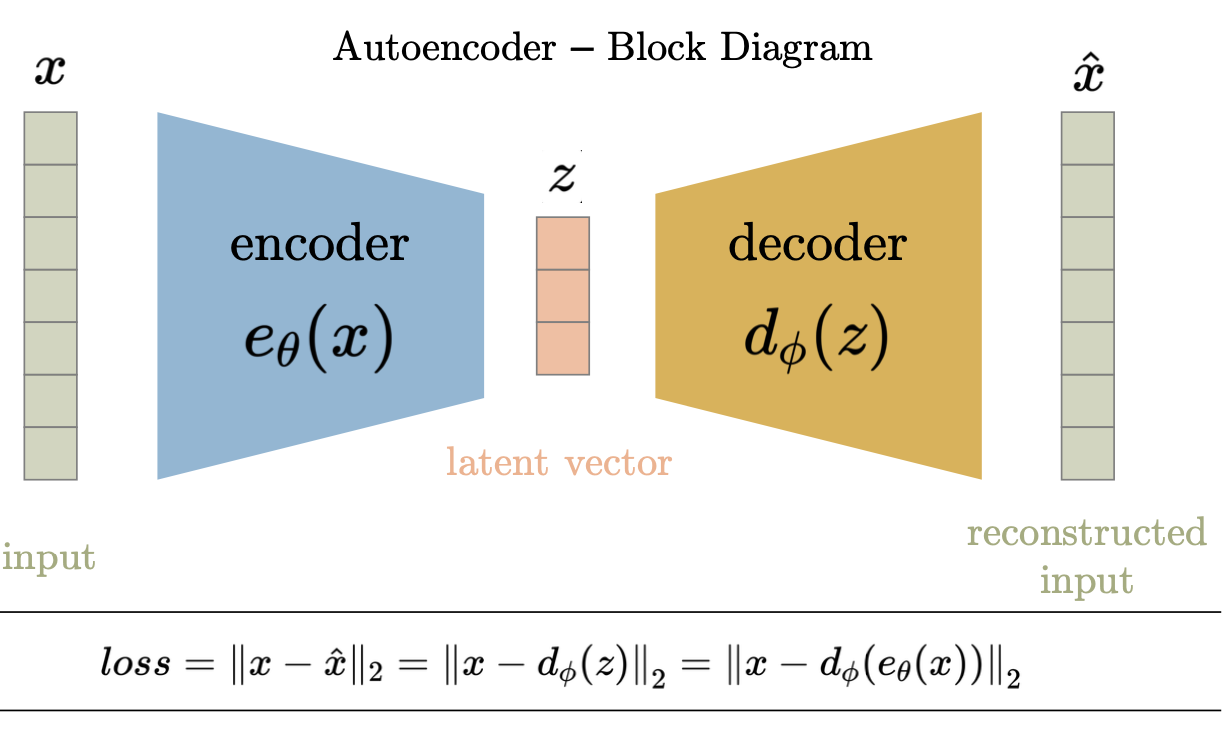

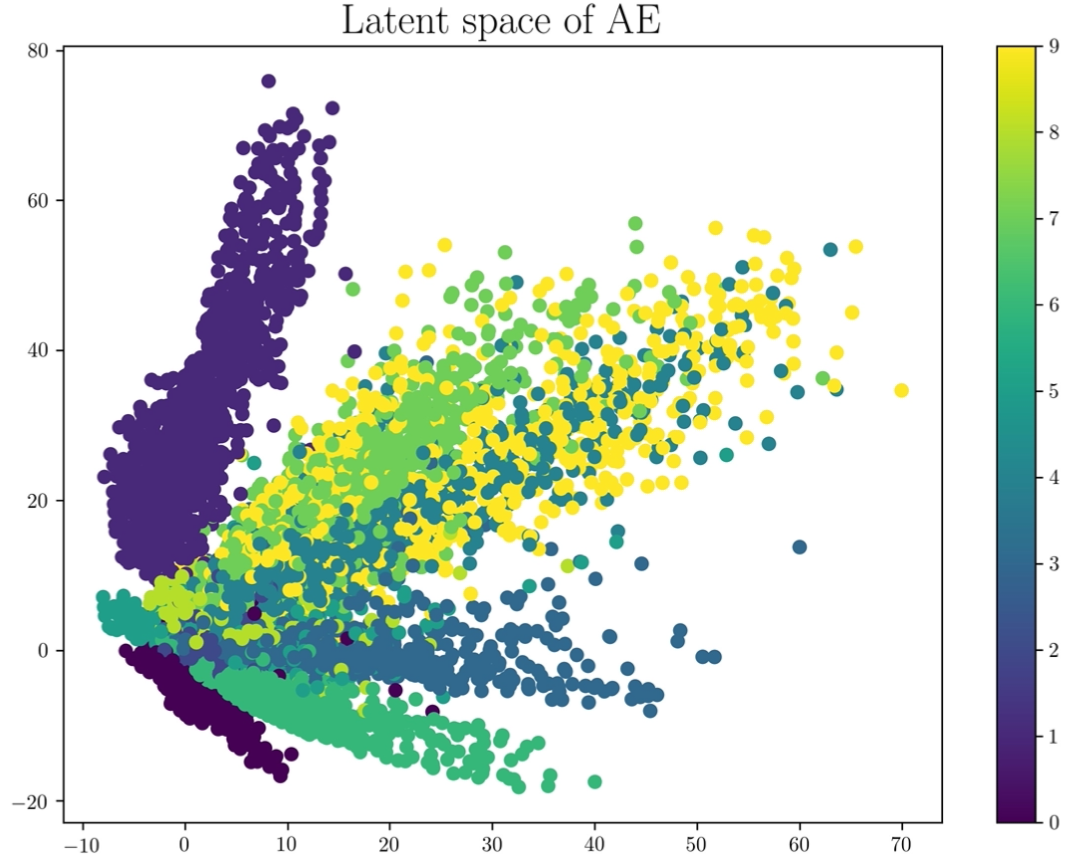

La "codificación automática" es un algoritmo de compresión de datos en el que las funciones de compresión y descompresión son 1) específicas de los datos, 2) con pérdida y 3) aprendidas automáticamente a partir de ejemplos en lugar de ser diseñadas por un ser humano. 


Además, en casi todos los contextos donde se usa el término "autocodificador", las funciones de compresión y descompresión se implementan con **redes neuronales**

1.-**¿Son buenos para comprimir información?**
Por lo general, no realmente. En la compresión de imágenes, por ejemplo, es bastante difícil entrenar un codificador automático que haga un mejor trabajo que un algoritmo básico como JPEG y, por lo general, la única forma de lograrlo es restringiéndose a un tipo de imagen muy específico (por ejemplo, uno para que JPEG no hace un buen trabajo). El hecho de que los codificadores automáticos sean específicos de los datos los hace generalmente poco prácticos para los problemas de compresión de datos del mundo real: solo puede usarlos en datos que son similares a los que fueron entrenados, y hacerlos más generales requiere muchos datos de entrenamiento. Pero los avances futuros podrían cambiar esto, quién sabe.

2.-**¿Para qué son buenos?**
Hoy en día, dos aplicaciones prácticas interesantes de los codificadores automáticos son la eliminación de ruido de datos y la reducción de dimensionalidad para la visualización de datos. Con las restricciones adecuadas de dimensionalidad y escasez, los codificadores automáticos pueden aprender proyecciones de datos que son más interesantes que PCA u otras técnicas básicas.

Para la visualización 2D específicamente, t-SNE (pronunciado "tee-snee") es probablemente el mejor algoritmo que existe, pero generalmente requiere datos de dimensiones relativamente bajas. Entonces, una buena estrategia para visualizar relaciones de similitud en datos de alta dimensión es comenzar usando un codificador automático para comprimir sus datos en un espacio de baja dimensión (por ejemplo, 32 dimensiones), luego use t-SNE para mapear los datos comprimidos a un plano 2D.  El algoritmo está en Keras y scikit-learn. 
https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding

In [42]:
import keras
from keras import layers


In [43]:
# Este es el tamaño de nuestra reporesentación con el codificador automático
encoding_dim = 32 #32 floats --> comprimir con un factor de 24.5, suponiendo 
#que el input es de 784 floats

In [44]:
784/32

24.5

In [45]:
#Este es e input de nuestra imagen
input_img = keras.Input(shape=(784,))

In [46]:
#"encoded" es la representación codificada del input
encoded = layers.Dense(encoding_dim, activation='relu')(input_img)
#"decoded" es la reconstrucción simple del input
decoded = layers.Dense(784, activation='sigmoid')(encoded)

#Este modelo transforma un input en su reconstrucción
autoencoder = keras.Model(input_img, decoded)

In [47]:
#Este modelo transforma un input en su representación codificada (encoded)
encoder = keras.Model(input_img, encoded)

In [48]:
#Este es el input para el codificador (32-dimensiones)
encoded_input = keras.Input(shape=(encoding_dim,))
#Obtenemos la última capa del modelo auto-codificador (autoencoder model)
decoder_layer = autoencoder.layers[-1]
#Creamos el modelo decodificador
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))


In [49]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [50]:
from keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()


In [51]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.


In [52]:
x_train.shape

(60000, 28, 28)

In [53]:
np.prod(x_train.shape[1:])

784

In [54]:
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [55]:
print(x_train.shape)
print(x_test.shape)


(60000, 784)
(10000, 784)


In [56]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))


Epoch 1/50
235/235 [==============================] - 2s 8ms/step - loss: 0.2794 - val_loss: 0.1924
Epoch 2/50
235/235 [==============================] - 2s 11ms/step - loss: 0.1723 - val_loss: 0.1539
Epoch 3/50
235/235 [==============================] - 3s 13ms/step - loss: 0.1443 - val_loss: 0.1338- ETA: 
Epoch 4/50
235/235 [==============================] - 2s 7ms/step - loss: 0.1284 - val_loss: 0.1212
Epoch 5/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1181 - val_loss: 0.1131
Epoch 6/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1113 - val_loss: 0.1074
Epoch 7/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1064 - val_loss: 0.1032
Epoch 8/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1028 - val_loss: 0.0999
Epoch 9/50
235/235 [==============================] - 2s 8ms/step - loss: 0.1000 - val_loss: 0.0975
Epoch 10/50
235/235 [==============================] - 2s 8ms/step - loss: 0.0979 - val_los

In [57]:
#Codificar y decodificar algunos dígitos
#Vamosa tomar los ejemplos del test set
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)


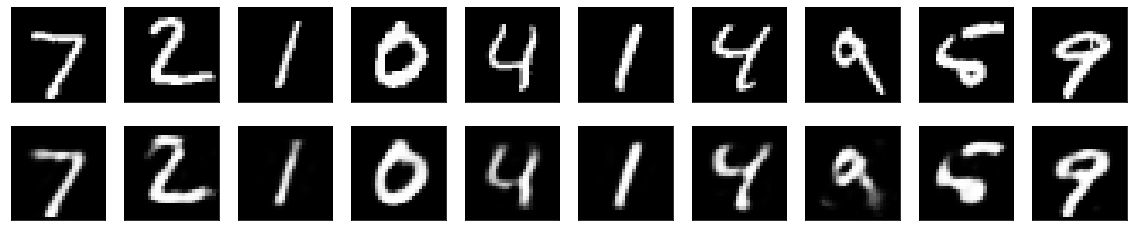

In [58]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
#originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


# Variational Auto Encoder (VAE)

El autocodificador variacional (Variational Auto Encoder) aborda el problema del espacio latente no regularizado en
Autoencoder y proporciona la capacidad generativa a todo el espacio. 

En lugar de generar los vectores en el espacio latente, el codificador de VAE genera parámetros de una
distribución predefinida en el espacio latente para cada input. 

El VAE luego impone una restricción en esta distribución latente forzándola a ser una distribución normal.

La variable latente en forma comprimida es la media y la varianza. 

La función de pérdida de VAE en el entrenamiento se define como la suma de la pérdida de reconstrucción y la pérdida de similitud. (Divergencia Kullback-Leibler (KL) entre la distribución gaussiana unitaria y de salida del decodificador)

La variable latente es suave y continua, es decir, los valores aleatorios de la variable latente generan
salida significativa en el decodificador, por lo tanto, el espacio latente tiene capacidades generativas

La entrada del decodificador se muestrea a partir de una gaussiana con media/varianza de la salida del codificador

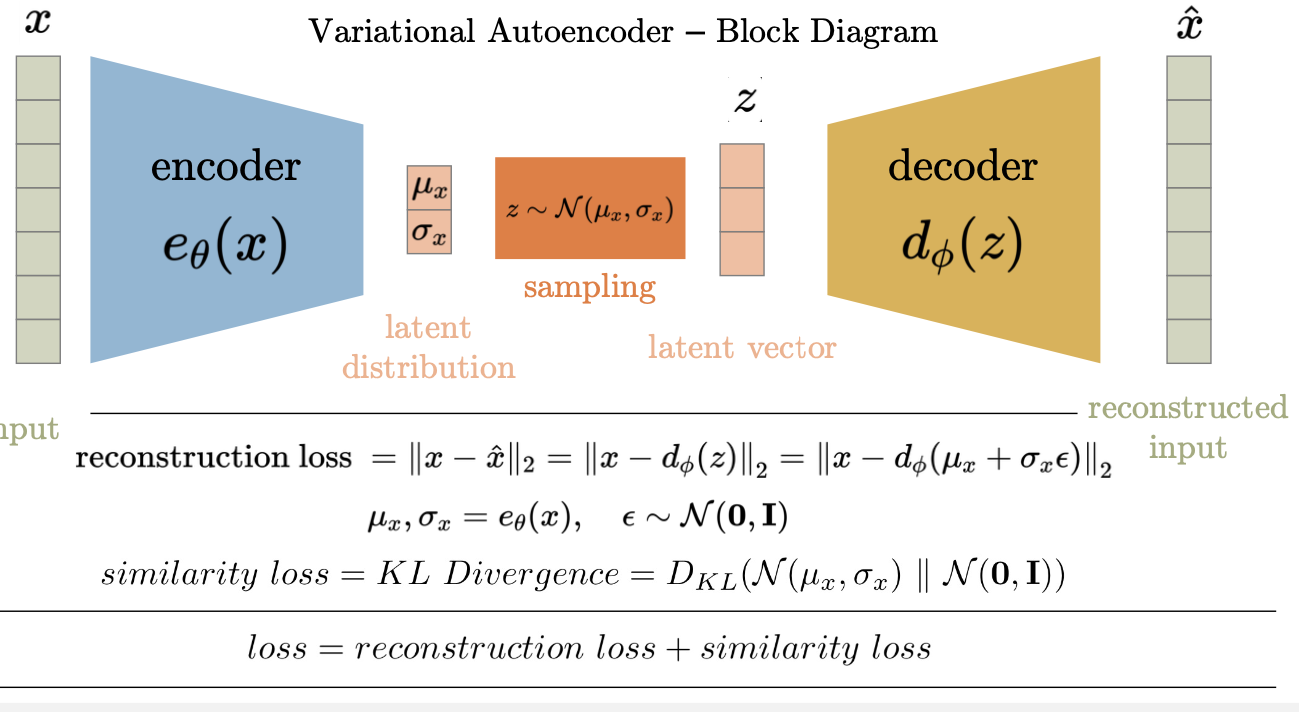

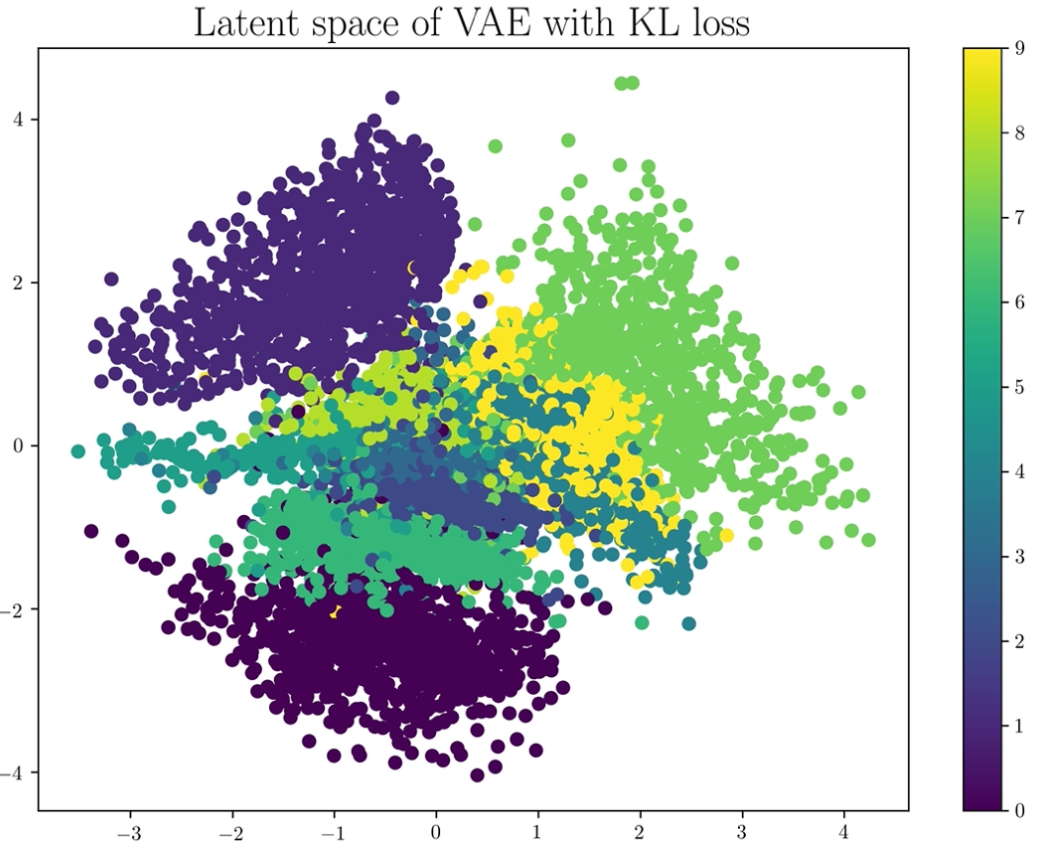

Los codificadores automáticos variacionales (Variational AutoEncoder (VAE)) son una versión un poco más moderna e interesante de la codificación automática.

**¿Qué es un codificador automático variacional?**
Es un tipo de codificador automático con restricciones adicionales sobre las representaciones codificadas que se aprenden. Más precisamente, es un codificador automático que aprende un modelo de variable latente para sus datos de entrada. Entonces, en lugar de dejar que su red neuronal aprenda una función arbitraria, está aprendiendo los parámetros de una distribución de probabilidad que modela sus datos. Si toma muestras de puntos de esta distribución, puede generar nuevas muestras de datos de entrada: un VAE es un "modelo generativo"

**¿Cómo funciona un autocodificador variacional?**

Primero, una red codificadora convierte las muestras de entrada x en dos parámetros en un espacio latente, que anotaremos z_mean y z_log_sigma. Luego, muestreamos aleatoriamente puntos z similares de la distribución normal latente que se supone que genera los datos, mediante z = z_mean + exp(z_log_sigma) * epsilon, donde epsilon es un tensor normal aleatorio. Finalmente, una red decodificadora asigna estos puntos de espacio latentes a los datos de entrada originales.

Los parámetros del modelo se entrenan a través de dos funciones de pérdida: una pérdida de reconstrucción que obliga a las muestras decodificadas a coincidir con las entradas iniciales (al igual que en nuestros codificadores automáticos anteriores), y la divergencia KL entre la distribución latente aprendida y la distribución anterior, que actúa como un plazo de regularización. De hecho, podría deshacerse de este último término por completo, aunque ayuda a aprender espacios latentes bien formados y a reducir el sobreajuste de los datos de entrenamiento.

In [70]:
original_dim = 28 * 28


In [71]:
original_dim

784

In [72]:
intermediate_dim = 64


In [73]:
latent_dim = 2


In [74]:
inputs = keras.Input(shape=(original_dim,))
h = layers.Dense(intermediate_dim, activation='relu')(inputs)
z_mean = layers.Dense(latent_dim)(h)
z_log_sigma = layers.Dense(latent_dim)(h)


In [75]:
from keras import backend as K
def sampling(args):
    z_mean, z_log_sigma = args
    epsilon = K.random_normal(shape=(K.shape(z_mean)[0], latent_dim),
                                                 mean=0., stddev=0.1)
    return z_mean + K.exp(z_log_sigma) * epsilon

z = layers.Lambda(sampling)([z_mean, z_log_sigma])




In [65]:
#Creador codificador (encoder)
encoder = keras.Model(inputs, [z_mean, z_log_sigma, z], name='encoder')


In [66]:
#creamos decodificador (decoder)
latent_inputs = keras.Input(shape=(latent_dim,), name='z_sampling')
x = layers.Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = layers.Dense(original_dim, activation='sigmoid')(x)
decoder = keras.Model(latent_inputs, outputs, name='decoder')


In [67]:
#Modelo VAE
outputs = decoder(encoder(inputs)[2])
vae = keras.Model(inputs, outputs, name='vae_mlp')


In [76]:
reconstruction_loss = keras.losses.binary_crossentropy(inputs, outputs)
reconstruction_loss *= original_dim
kl_loss = 1 + z_log_sigma - K.square(z_mean) - K.exp(z_log_sigma)
kl_loss *= -0.5
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae.add_loss(vae_loss)
vae.compile(optimizer='adam')


ValueError: Graph disconnected: cannot obtain value for tensor KerasTensor(type_spec=TensorSpec(shape=(None, 784), dtype=tf.float32, name='input_8'), name='input_8', description="created by layer 'input_8'") at layer "dense_19". The following previous layers were accessed without issue: []

In [69]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

vae.fit(x_train, x_train,
        epochs=10,
        batch_size=32,
        validation_data=(x_test, x_test))


Epoch 1/10


ValueError: in user code:

    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 878, in train_function  *
        return step_function(self, iterator)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 867, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 860, in run_step  **
        outputs = model.train_step(data)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/engine/training.py", line 808, in train_step
        y_pred = self(x, training=True)
    File "/opt/anaconda3/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 67, in error_handler
        raise e.with_traceback(filtered_tb) from None

    ValueError: Exception encountered when calling layer "tf.__operators__.add_4" (type TFOpLambda).
    
    Dimensions must be equal, but are 32 and 2 for '{{node vae_mlp/tf.__operators__.add_4/AddV2}} = AddV2[T=DT_FLOAT](vae_mlp/tf.math.multiply_3/Mul, vae_mlp/tf.math.multiply_4/Mul)' with input shapes: [32], [32,2].
    
    Call arguments received:
      • x=tf.Tensor(shape=(32,), dtype=float32)
      • y=tf.Tensor(shape=(32, 2), dtype=float32)
      • name=None


In [ ]:
x_test_vae = vae.predict(x_test, batch_size=32)


In [ ]:
x_test.shape

In [ ]:
x_test_vae.shape

In [ ]:
import matplotlib.pyplot as plt
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
#originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(x_test_vae[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()


In [ ]:
y_test

In [ ]:
x_test_encoded = encoder.predict(x_test, batch_size=32)


In [ ]:
len(x_test_encoded) #[z_mean, z_log_sigma, z]

In [ ]:
x_test_encoded[2] #z tiene dos dimensiones

In [ ]:
plt.figure(figsize=(6, 6))

plt.scatter(x_test_encoded[2][:, 0], x_test_encoded[2][:, 1], c=y_test,cmap="rainbow")
plt.colorbar()
plt.show()


# Ejercicio Finanzas
Usaremos un Variational AutoEncoder paa reducir las dimensiones de un vector de Series de Tiempo con 388 Series a 2 dimensiones. 

Los Autoencoders son algoritmos no supervisados usados para comprimir información. Se construyen, como ya mencionamos, con un Encoder, Decoder y una Función de Pérdida para medir la pérdida de información entre la información que se hizo la compresión y descompresión. 

https://arxiv.org/abs/1312.6114 (más información de modelos de VAE)

El objetivo de nuestro proyecto es detectar acciones que estén cerca de otra acción en el mismo mercado o de una clase de activo diferente en otro mercado.

In [746]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [747]:
#Descargar información de un Archivo que les compartiré
#Observar cuáles son los instrumentos más cercanos a uno de referencia
#y contruiremos un índice
#Esto se aplica mucho en la industria de Exchange-Traded Funds (ETFs)

In [748]:
stock_data=pd.read_excel(
    "/Users/CarlosCarrasco/Documents/Work/Covid/Archivos R/Working/2022-08-31_Carteras_Info1.xlsx",sheet_name='Datos')


In [749]:
stock_data.head()

,Fecha,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
0,1999-01-04,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,NaN,8.421189,NaN,4.408552,NaN,NaN,9.556062,6.390187,NaN,3.972161
1,1999-01-05,100.007452,100.008484,100.008841,101.352089,101.349906,101.349073,100.540648,101.187779,101.565038,...,NaN,8.647502,NaN,4.494844,NaN,NaN,9.812874,6.499619,NaN,4.049911
2,1999-01-06,100.014044,100.016108,100.016822,103.589872,103.585429,103.583733,101.427887,103.022749,103.245878,...,NaN,8.864071,NaN,4.633786,NaN,NaN,10.058628,6.649946,NaN,4.175100
3,1999-01-07,100.021359,100.024454,100.025526,103.371044,103.364350,103.361794,101.341909,102.699467,102.759012,...,NaN,8.893670,NaN,4.644228,NaN,NaN,10.092216,6.583103,NaN,4.184508
4,1999-01-08,100.029368,100.033496,100.034925,103.801094,103.792116,103.788688,101.510700,103.145001,104.020782,...,NaN,8.919592,NaN,4.680805,NaN,NaN,10.121632,6.626537,NaN,4.217465


In [750]:
stock_data=stock_data.set_index(['Fecha'])

In [751]:
stock_data.shape

(5960, 553)

In [752]:
stock_data.dropna(inplace=True)

In [753]:
stock_data.shape

(872, 553)

In [754]:
stock_data

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-20,147.588331,126.762168,125.244007,172.936392,161.980193,156.304451,126.214699,165.718941,332.826252,266.877563,...,25.782167,18.503429,21.631054,15.456390,6.519350,14.940984,23.168114,20.084255,15.714588,13.903992
2019-03-21,147.569699,126.156691,124.645782,173.966543,162.945080,157.235528,126.153717,166.426249,332.513981,269.891815,...,26.146494,18.697380,21.847540,15.781271,6.571389,15.203976,23.587690,20.259773,15.966695,14.101858
2019-03-22,147.862631,126.304306,124.791629,170.853872,160.029608,154.422214,125.339409,163.622416,326.906556,264.697388,...,25.559784,18.013662,21.531826,15.426856,6.371486,14.532434,23.032215,19.894346,15.545160,13.748743
2019-03-25,148.105682,126.041028,124.531504,170.320519,159.530045,153.940156,125.026141,163.370488,325.978594,264.498322,...,25.323206,17.807961,21.513786,15.350066,6.330237,14.553935,23.176043,19.863653,15.490766,13.739515
2019-03-26,148.105682,126.299866,124.787242,171.884708,160.995137,155.353911,125.639479,164.499426,328.852315,266.469940,...,25.890993,17.871634,21.712236,15.397323,6.314371,14.840087,23.239527,20.003685,15.569635,13.836622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,149.445584,120.978704,121.291913,264.272986,169.117934,208.273073,134.863683,216.124910,515.139259,419.510010,...,24.940001,29.200001,31.230000,22.850000,17.049999,15.030000,30.170000,29.920000,28.350000,21.370001
2022-08-26,149.924868,121.410395,121.554123,256.332587,164.913337,201.040540,133.762202,209.204579,502.960677,405.309998,...,23.840000,28.020000,30.730000,22.070000,16.790001,14.150000,28.950001,28.799999,27.670000,20.879999
2022-08-29,149.514939,121.151217,121.282976,254.108305,162.590930,196.859100,132.964636,207.446935,496.970166,402.630005,...,23.639999,27.900000,30.670000,21.780001,16.525000,13.910000,28.790001,28.639999,27.299999,20.719999


Text(0.5, 1.0, 'Sample Time Series')

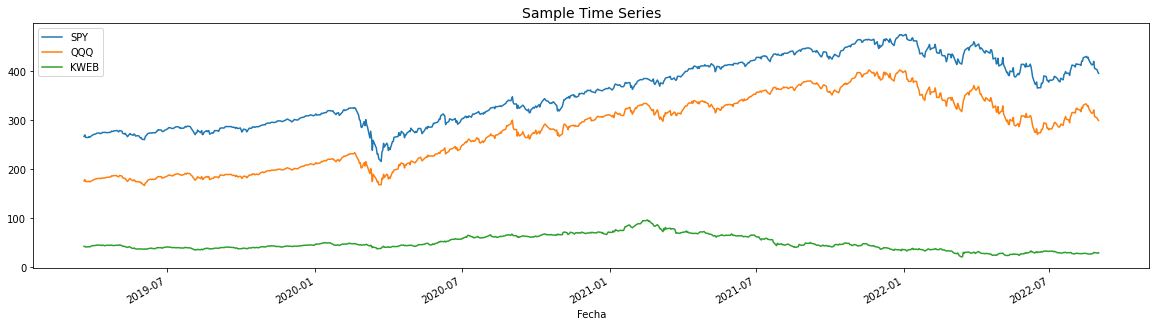

In [755]:
fig, axis = plt.subplots(figsize=(20,5))
stock_data[['SPY','QQQ','KWEB']].plot(ax = axis)
axis.set_title('Sample Time Series', fontsize = 14)

<AxesSubplot:xlabel='Fecha'>

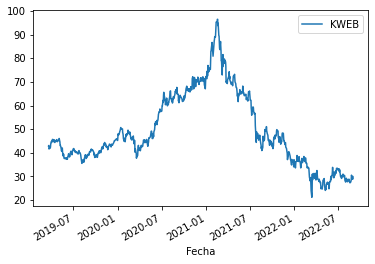

In [756]:
stock_data[["KWEB"]].plot()


**Promedio móvil geométrico**

El promedio móvil geométrico calcula una serie de medias geométricas de diferentes subconjuntos del conjunto de datos completo. Para comparar series de tiempo de varios rangos de precios, calcularemos la serie de tiempo media móvil geométrica de rendimientos que se define como:

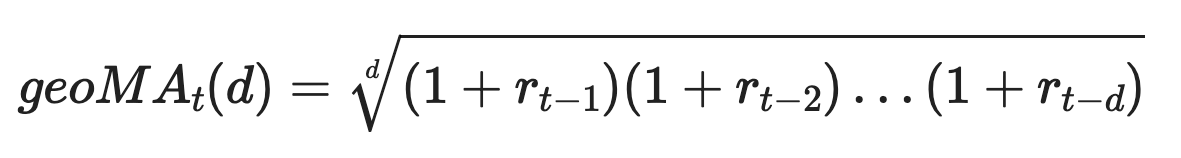

donde $r_t$ es el rendimiento del activo financiero para el día t.


Elegimos d=5 porque estamos interesados en el promedio móvil geométrico semanal y una semana comercial típica tiene 5 días hábiles.

Para cada día dado, calcularemos el promedio móvil geométrico de los últimos 5 días hábiles.

Para calcular el geoMA(5), primero debemos calcular el cambio porcentual diario de ambos marcos de datos.

In [757]:
stock_data_pct_change = stock_data.pct_change()
stock_data_pct_change.dropna(inplace = True)
stock_data_pct_change.tail()

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-08-25,-0.000303,-0.000579,0.001326,0.013532,0.014976,0.018912,0.006999,0.012756,0.010619,0.014118,...,0.012586,0.022051,0.006121,0.026966,0.029589,0.014170,0.020636,0.016995,0.015038,0.026417
2022-08-26,0.003207,0.003568,0.002162,-0.030046,-0.024862,-0.034726,-0.008167,-0.032020,-0.023641,-0.033849,...,-0.044106,-0.040411,-0.016010,-0.034136,-0.015249,-0.058550,-0.040437,-0.037433,-0.023986,-0.022929
2022-08-29,-0.002734,-0.002135,-0.002231,-0.008677,-0.014083,-0.020799,-0.005963,-0.008402,-0.011910,-0.006612,...,-0.008389,-0.004283,-0.001952,-0.013140,-0.015783,-0.016961,-0.005527,-0.005556,-0.013372,-0.007663
2022-08-30,-0.001500,0.005064,-0.001525,-0.011550,-0.010747,-0.003648,-0.005081,-0.006597,-0.008223,-0.010978,...,-0.003384,-0.010036,-0.016303,-0.007346,-0.003933,-0.008627,-0.007989,-0.007332,0.006227,-0.007722
2022-08-31,-0.003154,0.000003,0.000003,-0.007817,-0.007817,-0.007817,-0.003125,-0.005707,-0.006387,-0.007609,...,-0.001698,-0.009776,-0.004640,-0.000925,0.006683,0.002901,-0.005602,-0.007738,-0.016381,0.009241


In [758]:
kweb=stock_data_pct_change[["KWEB"]]

In [759]:
stock_data_pct_change=stock_data_pct_change.drop(["KWEB"],axis=1)

In [760]:
stock_data_pct_change

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-21,-0.000126,-0.004776,-0.004776,0.005957,0.005957,0.005957,-0.000483,0.004268,-0.000938,0.011295,...,0.014131,0.010482,0.010008,0.021019,0.007982,0.017602,0.018110,0.008739,0.016043,0.014231
2019-03-22,0.001985,0.001170,0.001170,-0.017892,-0.017892,-0.017892,-0.006455,-0.016847,-0.016864,-0.019246,...,-0.022439,-0.036568,-0.014451,-0.022458,-0.030420,-0.044169,-0.023549,-0.018037,-0.026401,-0.025040
2019-03-25,0.001644,-0.002084,-0.002084,-0.003122,-0.003122,-0.003122,-0.002499,-0.001540,-0.002839,-0.000752,...,-0.009256,-0.011419,-0.000838,-0.004978,-0.006474,0.001480,0.006245,-0.001543,-0.003499,-0.000671
2019-03-26,0.000000,0.002054,0.002054,0.009184,0.009184,0.009184,0.004906,0.006910,0.008816,0.007454,...,0.022422,0.003576,0.009224,0.003079,-0.002506,0.019662,0.002739,0.007050,0.005091,0.007068
2019-03-27,0.000372,0.000176,0.000176,-0.004536,-0.004536,-0.004536,-0.001709,-0.005852,-0.008131,-0.005229,...,-0.001097,-0.008167,0.000000,-0.008440,-0.001005,-0.021846,-0.001665,0.001630,-0.008210,-0.006259
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,-0.000303,-0.000579,0.001326,0.013532,0.014976,0.018912,0.006999,0.012756,0.010619,0.014118,...,0.012586,0.022051,0.006121,0.026966,0.029589,0.014170,0.020636,0.016995,0.015038,0.026417
2022-08-26,0.003207,0.003568,0.002162,-0.030046,-0.024862,-0.034726,-0.008167,-0.032020,-0.023641,-0.033849,...,-0.044106,-0.040411,-0.016010,-0.034136,-0.015249,-0.058550,-0.040437,-0.037433,-0.023986,-0.022929
2022-08-29,-0.002734,-0.002135,-0.002231,-0.008677,-0.014083,-0.020799,-0.005963,-0.008402,-0.011910,-0.006612,...,-0.008389,-0.004283,-0.001952,-0.013140,-0.015783,-0.016961,-0.005527,-0.005556,-0.013372,-0.007663


In [761]:
stock_data_pct_change=stock_data_pct_change.iloc[:,:100]

In [762]:
geoMA_5d_stocks = pd.DataFrame(columns = stock_data_pct_change.columns, index = stock_data_pct_change.index)
d = 5
for i in range(len(geoMA_5d_stocks.columns)):
    for j in range(d,len(geoMA_5d_stocks)):
        mult = 1
        for k in range(1,1+d):
            mult = mult * (stock_data_pct_change.loc[stock_data_pct_change.index[j-k]][geoMA_5d_stocks.columns[i]]+1)
            geoMA_5d_stocks.loc[geoMA_5d_stocks.index[j]][geoMA_5d_stocks.columns[i]] = np.power(mult,1/d)





In [763]:
geoMA_5d_stocks

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,CWI,RPG,JPGE,XMMO,DON,DHS,VEA,VGT,VTWO,FVD
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-03-27,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,1.000027,1.000381,0.998981,0.9941,0.99072,0.99147,0.997364,0.994796,0.996985,0.99384,...,0.994439,0.992906,1.0,0.995945,0.996518,0.998543,0.993751,0.991481,0.994677,0.994368
2022-08-26,0.998964,0.999302,0.998427,0.995359,0.992999,0.993089,0.998079,0.99596,0.998752,0.996052,...,0.998207,0.99569,1.0,0.997612,0.997877,0.99935,0.99672,0.994018,0.996488,0.996215
2022-08-29,0.999967,1.000351,0.999705,0.992317,0.991555,0.99075,0.99841,0.99192,0.994464,0.991896,...,0.996188,0.991887,1.0,0.995495,0.995428,0.995967,0.99436,0.989294,0.994098,0.992714


In [764]:
#Vamos a hacer un drop de los Nan (que van a ser las primeras 
#5 lineas las que contengan Nan porque estamos calculando Promedio de 5 días)

In [765]:
geoMA_5d_stocks.dropna(inplace=True)

In [766]:
geoMA_5d_stocks_T=geoMA_5d_stocks.T

In [767]:
geoMA_5d_stocks_T

Fecha,2019-03-28,2019-03-29,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-08,2019-04-09,2019-04-10,...,2022-08-18,2022-08-19,2022-08-22,2022-08-23,2022-08-24,2022-08-25,2022-08-26,2022-08-29,2022-08-30,2022-08-31
ESCALA,1.000774,1.000725,1.000328,0.999504,0.999655,0.99943,0.999555,0.99958,1.000126,1.000126,...,0.998518,1.000232,1.000176,0.999071,0.999751,1.000027,0.998964,0.999967,0.999959,0.999521
ACTICOB,0.999305,1.000158,0.999628,1.000765,1.000093,0.999615,1.000318,1.000462,0.99976,0.999919,...,0.998782,1.000471,1.000376,0.999716,1.000228,1.000381,0.999302,1.000351,1.000157,1.001043
ACTOTAL,0.999305,1.000158,0.999628,1.000765,1.000093,0.999615,1.000318,1.000462,0.99976,0.999919,...,0.997733,0.999294,0.999833,0.99863,0.999065,0.998981,0.998427,0.999705,0.999693,0.999398
ACTI500,0.997873,0.997286,1.001927,1.005546,1.003437,1.004322,1.004727,1.004453,1.001651,1.000588,...,1.001847,1.00401,0.997992,0.992381,0.991954,0.9941,0.995359,0.992317,0.994918,0.993023
ESFERA,0.997873,0.997286,1.001927,1.005546,1.003437,1.004322,1.004727,1.004453,1.001651,1.000588,...,0.997338,0.998433,0.994916,0.98779,0.987074,0.99072,0.992999,0.991555,0.994955,0.994195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
DHS,1.001057,0.999043,1.001805,1.004068,1.001513,1.001821,1.002368,1.002963,1.000901,0.999562,...,1.003918,1.003316,1.000438,0.998124,0.997737,0.998543,0.99935,0.995967,0.997944,0.994633
VEA,0.997238,0.996923,1.001495,1.004079,1.002997,1.004836,1.004574,1.004318,1.001877,1.00053,...,0.998706,0.998056,0.993421,0.991617,0.991816,0.993751,0.99672,0.99436,0.997101,0.995062
VGT,0.998858,0.994786,1.001935,1.005547,1.004955,1.007913,1.00599,1.004916,1.002922,1.001427,...,1.001769,1.003981,0.99598,0.989261,0.989485,0.991481,0.994018,0.989294,0.992231,0.990689
VTWO,0.997392,0.996439,1.004394,1.005923,1.003238,1.004966,1.004382,1.005707,1.003036,1.000949,...,1.002146,1.002586,0.994292,0.989448,0.989807,0.994677,0.996488,0.994098,0.996412,0.993371


Text(0, 0.5, '5-day Geometric MA')

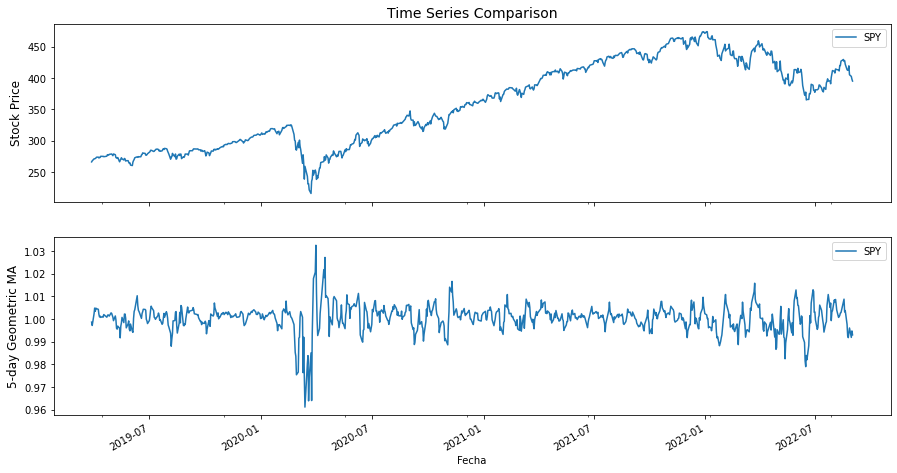

In [768]:
fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True, figsize=(15,8))
#stock_data[['SPY','QUAL','IVV']].loc[geoMA_5d_stocks.index[0]:].plot(ax=axes[0])
stock_data[['SPY']].loc[geoMA_5d_stocks.index[0]:].plot(ax=axes[0])


axes[0].set_ylabel('Stock Price', fontsize = 12)
axes[0].set_title('Time Series Comparison', fontsize = 14)

#geoMA_5d_stocks[['SPY','QUAL','IVV']].plot(ax=axes[1])
geoMA_5d_stocks[['SPY']].plot(ax=axes[1])

axes[1].set_ylabel('5-day Geometric MA', fontsize = 12)



In [769]:
# Divide in two
geoMA_5d_stocks_p1 = geoMA_5d_stocks.head(int(len(geoMA_5d_stocks)/2))
geoMA_5d_stocks_p2 = geoMA_5d_stocks.tail(int(len(geoMA_5d_stocks)/2))# Transpose the dataframe for period 1


geoMA_5d_stocks_p1_T = geoMA_5d_stocks_p1.T


In [770]:
geoMA_5d_stocks_p1_T.head()

Fecha,2019-03-28,2019-03-29,2019-04-01,2019-04-02,2019-04-03,2019-04-04,2019-04-05,2019-04-08,2019-04-09,2019-04-10,...,2020-12-02,2020-12-03,2020-12-04,2020-12-07,2020-12-08,2020-12-09,2020-12-10,2020-12-11,2020-12-14,2020-12-15
ESCALA,1.000774,1.000725,1.000328,0.999504,0.999655,0.99943,0.999555,0.99958,1.000126,1.000126,...,0.999947,0.999956,1.000008,0.999908,0.999916,0.999908,0.999808,0.999764,0.999849,0.999796
ACTICOB,0.999305,1.000158,0.999628,1.000765,1.000093,0.999615,1.000318,1.000462,0.99976,0.999919,...,0.999937,0.999918,0.99995,0.999874,0.999937,0.999976,0.999938,0.999944,1.000013,0.999899
ACTOTAL,0.999305,1.000158,0.999628,1.000765,1.000093,0.999615,1.000318,1.000462,0.99976,0.999919,...,1.000026,1.000011,1.000192,1.000034,1.00021,1.000329,1.000167,1.000096,1.000297,0.999924
ACTI500,0.997873,0.997286,1.001927,1.005546,1.003437,1.004322,1.004727,1.004453,1.001651,1.000588,...,0.999891,1.000524,1.002163,1.003324,1.003883,1.00224,1.000104,1.000028,0.998041,0.997596
ESFERA,0.997873,0.997286,1.001927,1.005546,1.003437,1.004322,1.004727,1.004453,1.001651,1.000588,...,1.000865,1.000489,1.002909,1.002408,1.003647,1.002532,1.001527,1.000946,0.999038,0.999346


In [771]:
geoMA_5d_stocks_p1_T.iloc[0]

Fecha
2019-03-28    1.000774
2019-03-29    1.000725
2019-04-01    1.000328
2019-04-02    0.999504
2019-04-03    0.999655
                ...   
2020-12-09    0.999908
2020-12-10    0.999808
2020-12-11    0.999764
2020-12-14    0.999849
2020-12-15    0.999796
Name: ESCALA, Length: 433, dtype: object

In [772]:
n_simpath_per_ticker = 100
n_tickers_selected = 100
random_tickers_selected = np.random.choice(len(geoMA_5d_stocks_p1_T), n_tickers_selected)
n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker

sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))



In [773]:
sim_paths_matrix.shape

(10000, 433)

In [774]:
sim_paths_matrix[1*100+2]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [775]:
random_tickers_selected[1]

16

In [776]:
geoMA_5d_stocks_p1_T.iloc[0].name

'ESCALA'

In [777]:
geoMA_5d_stocks_p1_T.iloc[0].values.astype(np.float64)

array([1.00077448, 1.00072473, 1.00032791, 0.99950444, 0.99965544,
       0.99942968, 0.99955499, 0.99958029, 1.00012592, 1.00012629,
       1.0005055 , 1.00032924, 1.0002281 , 1.00010226, 0.99985061,
       0.99962311, 0.99969844, 1.00004921, 1.00029996, 1.00035022,
       1.00070484, 1.00055504, 1.00053108, 1.00018001, 1.00040722,
       1.00025429, 1.00050452, 1.00010274, 1.00040282, 1.00027624,
       1.00027505, 1.00022504, 1.00057671, 1.00032623, 1.00032555,
       0.9999993 , 0.99987334, 0.99974798, 1.00019943, 1.00012441,
       1.00025027, 1.0005757 , 1.00057501, 1.00055227, 1.00091719,
       1.00143204, 1.00103086, 1.00118151, 1.00077907, 1.00071478,
       1.00004703, 1.00014818, 1.00009739, 1.0004704 , 1.00007025,
       1.00027341, 0.99999458, 1.00216581, 1.00077258, 1.00019498,
       1.00106768, 1.00150111, 0.99907626, 1.00048391, 1.00115462,
       0.99968685, 1.00024008, 1.00059758, 0.99988631, 0.99995538,
       0.99999201, 0.99818304, 1.00008486, 0.99997715, 1.00002

In [778]:
np.diff(np.log(geoMA_5d_stocks_p1_T.iloc[0].values.astype(np.float64)))

array([-4.97179718e-05, -3.96613860e-04, -8.23535060e-04,  1.51066568e-04,
       -2.25863270e-04,  1.25375848e-04,  2.53029136e-05,  5.45717222e-04,
        3.67969981e-07,  3.79090271e-04, -1.76190459e-04, -1.01107066e-04,
       -1.25821010e-04, -2.51653216e-04, -2.27563584e-04,  7.53565921e-05,
        3.50815148e-04,  2.50708305e-04,  5.02434524e-05,  3.54428622e-04,
       -1.49706506e-04, -2.39416607e-05, -3.50950174e-04,  2.27146912e-04,
       -1.52882951e-04,  2.50133390e-04, -4.01659332e-04,  3.00006733e-04,
       -1.26537970e-04, -1.18362309e-06, -5.00012479e-05,  3.51527784e-04,
       -2.50361599e-04, -6.83257938e-07, -3.26196756e-04, -1.25968740e-04,
       -1.25380561e-04,  4.51456786e-04, -7.50046673e-05,  1.25834709e-04,
        3.25296031e-04, -6.86827669e-07, -2.27273765e-05,  3.64649013e-04,
        5.14248682e-04, -4.00693256e-04,  1.50483322e-04, -4.02044778e-04,
       -6.42334479e-05, -6.67504665e-04,  1.01142474e-04, -5.07820161e-05,
        3.72903550e-04, -

In [779]:
for i in range(len(random_tickers_selected)):
    random_index = random_tickers_selected[i]
    rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_p1_T.iloc[random_index].values.astype(np.float64)))
    for j in range(n_simpath_per_ticker):
        sim_path = np.zeros(len(geoMA_5d_stocks_p1_T.iloc[random_index]))
        sim_path[0] = geoMA_5d_stocks_p1_T.iloc[random_index][0]
        for k in range(1,len(sim_path)):
            sim_path[k] = sim_path[0]*np.exp(rd_stock_logReturns[np.random.randint(0, len(rd_stock_logReturns))])
        sim_paths_matrix[i*100+j] = sim_path
    
    
    
    

In [780]:
random_tickers_selected[0]

76

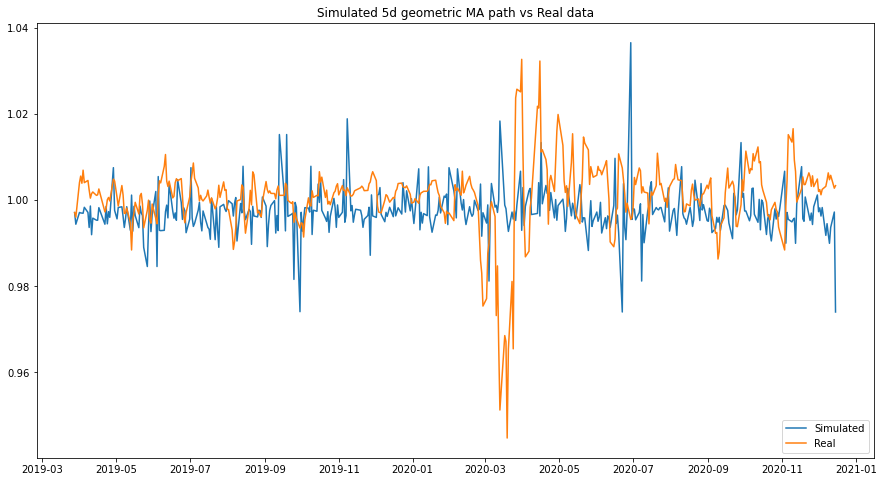

In [781]:
#Vamos a graficar una muestra generada conta una muestra de una serie de 
#iempo real de los datos

fig, ax = plt.subplots(figsize=(15,8))
ax.plot(geoMA_5d_stocks_p1_T.columns, sim_paths_matrix[0], label = 'Simulated')

ax.plot(geoMA_5d_stocks_p1_T.columns, geoMA_5d_stocks_p1_T.iloc[random_tickers_selected[0]], label = 'Real')
ax.set_title('Simulated 5d geometric MA path vs Real data')
Legend = ax.legend(loc='lower right')


In [782]:
sim_paths_matrix.shape

(10000, 433)

In [783]:
#Intercambiar trayectorias 
shuffled_array = np.random.permutation(sim_paths_matrix)

In [784]:
shuffled_array

array([[0.99720004, 0.99841689, 0.99631886, ..., 0.99732567, 1.00582193,
        0.99706284],
       [0.99633277, 0.99631859, 0.99839006, ..., 0.9957078 , 0.99523089,
        0.99347211],
       [0.99884482, 0.99090007, 0.99594042, ..., 0.99942861, 0.997458  ,
        0.99329911],
       ...,
       [0.99876718, 0.99897207, 0.99403606, ..., 0.99945329, 0.99894632,
        1.00842672],
       [0.99838091, 0.99603297, 0.99680871, ..., 0.99773153, 1.00090053,
        0.99980794],
       [1.00005512, 1.00037198, 0.99657846, ..., 0.99881888, 1.00096972,
        1.00023803]])

In [785]:
shuffled_array.shape

(10000, 433)

In [786]:
#Vamos a separar los datos simulados en train y test
x_train = shuffled_array[0:8000]
x_test = shuffled_array[8000:]


In [787]:
x_train.shape

(8000, 433)

In [788]:
x_train.shape[1]

433

In [789]:
#Vamos a preparar nuestra red neuronal

In [790]:
original_dim = x_train.shape[1]
input_shape = (original_dim, )
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 10

In [791]:
import os
import pandas as pd
import numpy as np
import scipy
from tensorflow.keras.layers import Lambda, Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras import backend as K
import matplotlib.pyplot as plt
import argparse
from numpy.random import seed
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
from tensorflow.keras import losses


In [792]:
#Trasnformar l input aa los parámetros de la distribución latete
#VAe Model= encoder + decoder
#construir el modelo encoder (codificador)
inputs = Input(shape=input_shape, name='encoder_input')
x = Dense(intermediate_dim, activation='relu')(inputs)
z_mean = Dense(latent_dim, name='z_mean')(x)
z_log_var = Dense(latent_dim, name='z_log_var')(x)

In [793]:
#Vamos a usar esos parámetros para hacr muestreo de nuevos puntos del 
#espacio latente
#truco de reparametrización
#En lugar de muestrear de Q(z|X), muestrar epsilon =N(0,1)
#z=z_mean + sqrt(var)*epsilon

def sampling(args):
    """Truco de reparametrización para muestrear
    de una gausiana unitaria
     # Argumentos
     arg(tensor): mean y log de la variance of Q(z|x)

     #Returns
     z(tensor): vector latente muestreado
     """

    z_mean, z_log_var = args

    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]

    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon


In [794]:
#Vamos a usar el truco de reparametrización para obtener los muestreos
#no es necesario que pongan output_shape porque con el backend de la
#función ya está hecho
z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])





In [795]:
#Inicializar nuestro modelo encoder (codificador)
encoder = Model(inputs, z_mean)

In [796]:
encoder.summary()

Model: "model_49"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 encoder_input (InputLayer)  [(None, 433)]             0         
                                                                 
 dense_151 (Dense)           (None, 300)               130200    
                                                                 
 z_mean (Dense)              (None, 2)                 602       
                                                                 
Total params: 130,802
Trainable params: 130,802
Non-trainable params: 0
_________________________________________________________________


In [797]:
#Vamos a construir el decoder (decodificador)
latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
x = Dense(intermediate_dim, activation='relu')(latent_inputs)
outputs = Dense(original_dim, activation='sigmoid')(x)

In [798]:
#Inicializamos el modelo decoder (decodificado)
decoder = Model(latent_inputs, outputs, name='decoder')
decoder.summary()

Model: "decoder"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 z_sampling (InputLayer)     [(None, 2)]               0         
                                                                 
 dense_152 (Dense)           (None, 300)               900       
                                                                 
 dense_153 (Dense)           (None, 433)               130333    
                                                                 
Total params: 131,233
Trainable params: 131,233
Non-trainable params: 0
_________________________________________________________________


In [799]:
#Inicializamos el modelo VAE:
outputs = decoder(encoder(inputs))
vae = Model(inputs, outputs, name='vae_mlp')

In [800]:
from tensorflow.keras.optimizers import Adam

In [801]:
#Turorial de Keras les permite personalizar sus funciones de pérdida
#Vamos a definir nuesra función de pérdida personalizada
def sen_loss(encoder_inputs, decoder_outputs):
    sl = losses.binary_crossentropy(encoder_inputs, decoder_outputs)
    return K.sum(sl, axis=-1)
def kl_loss(z_mean, z_log_var):
    return - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
optimizer = Adam(learning_rate=0.01)
vae.compile(optimizer=optimizer, loss=[sen_loss, kl_loss], loss_weights=[1.,1.])
    
    

In [802]:
#Finalmente vamos a entrenarlo
results = vae.fit(x_train, x_train,
        shuffle=True,
        epochs=epochs,
        batch_size=batch_size,
        validation_data=(x_test, x_test))

Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 4.1086 - val_loss: 1.1391
Epoch 2/10
63/63 [==============================] - 0s 4ms/step - loss: 1.1342 - val_loss: 1.1639
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 1.1221 - val_loss: 1.1355
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 1.1177 - val_loss: 1.1385
Epoch 5/10
63/63 [==============================] - 0s 5ms/step - loss: 1.1193 - val_loss: 1.1356
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 1.1207 - val_loss: 1.1389
Epoch 7/10
63/63 [==============================] - 0s 5ms/step - loss: 1.1188 - val_loss: 1.1442
Epoch 8/10
63/63 [==============================] - 0s 6ms/step - loss: 1.1260 - val_loss: 1.1371
Epoch 9/10
63/63 [==============================] - 0s 4ms/step - loss: 1.1171 - val_loss: 1.1375
Epoch 10/10
63/63 [==============================] - 0s 4ms/step - loss: 1.1215 - val_loss: 1.1494


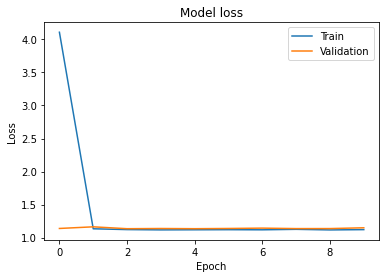

In [803]:
#Vamos agraficar para cada epoch el entrenaimiento y la prueba
plt.plot(results.history['loss'])
plt.plot(results.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Hacer Predicciones

In [804]:
stock_data_pct_change = stock_data.pct_change()
stock_data_pct_change.dropna(inplace = True)
stock_data_pct_change.tail()

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
Fecha,,,,,,,,,,,,,,,,,,,,,
2022-08-25,-0.000303,-0.000579,0.001326,0.013532,0.014976,0.018912,0.006999,0.012756,0.010619,0.014118,...,0.012586,0.022051,0.006121,0.026966,0.029589,0.014170,0.020636,0.016995,0.015038,0.026417
2022-08-26,0.003207,0.003568,0.002162,-0.030046,-0.024862,-0.034726,-0.008167,-0.032020,-0.023641,-0.033849,...,-0.044106,-0.040411,-0.016010,-0.034136,-0.015249,-0.058550,-0.040437,-0.037433,-0.023986,-0.022929
2022-08-29,-0.002734,-0.002135,-0.002231,-0.008677,-0.014083,-0.020799,-0.005963,-0.008402,-0.011910,-0.006612,...,-0.008389,-0.004283,-0.001952,-0.013140,-0.015783,-0.016961,-0.005527,-0.005556,-0.013372,-0.007663
2022-08-30,-0.001500,0.005064,-0.001525,-0.011550,-0.010747,-0.003648,-0.005081,-0.006597,-0.008223,-0.010978,...,-0.003384,-0.010036,-0.016303,-0.007346,-0.003933,-0.008627,-0.007989,-0.007332,0.006227,-0.007722
2022-08-31,-0.003154,0.000003,0.000003,-0.007817,-0.007817,-0.007817,-0.003125,-0.005707,-0.006387,-0.007609,...,-0.001698,-0.009776,-0.004640,-0.000925,0.006683,0.002901,-0.005602,-0.007738,-0.016381,0.009241


In [805]:
stock_data_pct_change_new=kweb

In [806]:
geoMA_5d_stocks_new = pd.DataFrame(columns = stock_data_pct_change_new.columns, index = stock_data_pct_change_new.index)




d = 5

for i in range(len(geoMA_5d_stocks_new.columns)):
    for j in range(d,len(geoMA_5d_stocks_new)):
        mult = 1
        for k in range(1,1+d):
            mult = mult * (stock_data_pct_change_new.loc[stock_data_pct_change_new.index[j-k]][geoMA_5d_stocks_new.columns[i]]+1)
            geoMA_5d_stocks_new.loc[geoMA_5d_stocks_new.index[j]][geoMA_5d_stocks_new.columns[i]] = np.power(mult,1/d)




In [807]:
geoMA_5d_stocks_new

,KWEB
Fecha,
2019-03-21,NaN
2019-03-22,NaN
2019-03-25,NaN
2019-03-26,NaN
2019-03-27,NaN
...,...
2022-08-25,1.004558
2022-08-26,1.021482
2022-08-29,1.020592


In [808]:
int(len(geoMA_5d_stocks_new)/2)

435

In [809]:
# Divide in two
geoMA_5d_stocks_new

,KWEB
Fecha,
2019-03-21,NaN
2019-03-22,NaN
2019-03-25,NaN
2019-03-26,NaN
2019-03-27,NaN
...,...
2022-08-25,1.004558
2022-08-26,1.021482
2022-08-29,1.020592


In [810]:
geoMA_5d_stocks_p1_new = geoMA_5d_stocks_new.head(int(len(geoMA_5d_stocks_new)/2))
geoMA_5d_stocks_p2_new = geoMA_5d_stocks_new.tail(int(len(geoMA_5d_stocks_new)/2))# Transpose the dataframe for period 1
geoMA_5d_stocks_p1_T_new = geoMA_5d_stocks_p1_new.T

In [811]:
len(geoMA_5d_stocks_p1_new)

435

In [812]:
#Probaremos para periodo 1
dataframe_to_test_p1 = geoMA_5d_stocks_p1.join(geoMA_5d_stocks_p1_new).fillna(1)




In [813]:
dataframe_to_test_p1

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,RPG,JPGE,XMMO,DON,DHS,VEA,VGT,VTWO,FVD,KWEB
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-28,1.000774,0.999305,0.999305,0.997873,0.997873,0.997873,0.998745,0.997352,0.995973,0.998647,...,1.000017,0.998239,0.997421,1.000823,1.001057,0.997238,0.998858,0.997392,1.001531,0.996336
2019-03-29,1.000725,1.000158,1.000158,0.997286,0.997286,0.997286,0.999019,0.996845,0.996548,0.997160,...,0.998392,0.997772,0.995804,0.999476,0.999043,0.996923,0.994786,0.996439,0.999753,0.996662
2019-04-01,1.000328,0.999628,0.999628,1.001927,1.001927,1.001927,1.000550,1.001015,1.002026,1.002303,...,1.003546,1.001578,1.003899,1.004789,1.001805,1.001495,1.001935,1.004394,1.002420,1.009793
2019-04-02,0.999504,1.000765,1.000765,1.005546,1.005546,1.005546,1.002681,1.004211,1.003585,1.004820,...,1.005154,1.003876,1.006016,1.006560,1.004068,1.004079,1.005547,1.005923,1.003712,1.013005
2019-04-03,0.999655,1.000093,1.000093,1.003437,1.003437,1.003437,1.001435,1.002542,1.001092,1.003427,...,1.003353,1.001982,1.005236,1.003864,1.001513,1.002997,1.004955,1.003238,1.001418,1.011510
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-09,0.999908,0.999976,1.000329,1.002240,1.002532,1.002952,1.002043,1.004110,1.002646,1.002257,...,1.003210,1.000000,1.003532,1.003860,1.005517,1.001946,1.003518,1.008981,1.001488,1.006166
2020-12-10,0.999808,0.999938,1.000167,1.000104,1.001527,1.000347,1.000925,1.001749,0.999864,1.000033,...,1.000890,1.000000,1.002062,1.003800,1.003720,1.001900,0.999609,1.006940,1.001601,1.004198
2020-12-11,0.999764,0.999944,1.000096,1.000028,1.000946,1.000392,1.000856,1.001030,1.000610,1.000022,...,1.000557,1.000000,1.002714,1.003087,1.002929,1.001636,1.000367,1.007723,1.000860,1.000000


In [814]:
matrix_to_test_p1 = dataframe_to_test_p1.T.values

In [815]:
matrix_to_test_p1

array([[1.00077448, 1.00072473, 1.00032791, ..., 0.99976358, 0.99984916,
        0.99979601],
       [0.99930465, 1.0001584 , 0.99962766, ..., 0.99994419, 1.00001333,
        0.99989902],
       [0.99930465, 1.0001584 , 0.99962766, ..., 1.00009604, 1.00029725,
        0.9999244 ],
       ...,
       [0.99739166, 0.99643927, 1.00439391, ..., 1.00772318, 1.00212131,
        1.00246101],
       [1.00153117, 0.9997528 , 1.00241964, ..., 1.00085984, 0.99863225,
        0.99851032],
       [0.99633609, 0.99666169, 1.00979294, ..., 1.        , 1.        ,
        1.        ]])

In [816]:
encoded_p1 = encoder.predict(matrix_to_test_p1, batch_size=batch_size)
# Convert the predictions into a dataframe
encoded_p1_df = pd.DataFrame(data = encoded_p1, columns = ['x','y'], index = dataframe_to_test_p1.T.index)


In [817]:
encoded_p1

array([[-21.725872, -26.063438],
       [-21.7236  , -26.059536],
       [-21.724216, -26.060213],
       [-21.735567, -26.07476 ],
       [-21.734118, -26.073387],
       [-21.744204, -26.084665],
       [-21.729132, -26.066486],
       [-21.733576, -26.072279],
       [-21.739326, -26.080772],
       [-21.737818, -26.07719 ],
       [-21.737867, -26.077255],
       [-21.737482, -26.076889],
       [-21.737843, -26.077251],
       [-21.73873 , -26.078236],
       [-21.73911 , -26.07881 ],
       [-21.738861, -26.078487],
       [-21.738659, -26.078285],
       [-21.737944, -26.07733 ],
       [-21.736689, -26.0759  ],
       [-21.735981, -26.075043],
       [-21.73866 , -26.07826 ],
       [-21.738565, -26.078094],
       [-21.737537, -26.076914],
       [-21.738323, -26.077892],
       [-21.731348, -26.069601],
       [-21.731379, -26.069656],
       [-21.734278, -26.072796],
       [-21.736254, -26.075317],
       [-21.73287 , -26.071497],
       [-21.74184 , -26.082123],
       [-2

In [818]:
encoded_p1_df.tail()

,x,y
VEA,-21.733116,-26.071438
VGT,-21.750265,-26.091381
VTWO,-21.737688,-26.076845
FVD,-21.729876,-26.067753
KWEB,-21.747404,-26.088993


In [819]:
ref_point = encoded_p1_df.loc['KWEB'].values


In [820]:
encoded_p1_df['Distance'] = scipy.spatial.distance.cdist([ref_point], encoded_p1_df, metric='euclidean')[0]


In [821]:
closest_points = encoded_p1_df.sort_values('Distance', ascending = True)
closest_points_top50 = closest_points.head(51)[1:] #We take head(51), because the Futures reference point is the first entry
closest_points_top50['Ticker'] = closest_points_top50.index


In [822]:
closest_points

,x,y,Distance
KWEB,-21.747404,-26.088993,0.000000
VCR,-21.747240,-26.088806,0.000249
MGK,-21.746101,-26.086988,0.002391
VUG,-21.745726,-26.086538,0.002974
VGT,-21.750265,-26.091381,0.003727
...,...,...,...
ESCALA,-21.725872,-26.063438,0.033417
DTN,-21.724646,-26.061457,0.035724
ACTOTAL,-21.724216,-26.060213,0.036959
ACTICOB,-21.723600,-26.059536,0.037873


In [823]:
closest_points_top50

,x,y,Distance,Ticker
VCR,-21.747240,-26.088806,0.000249,VCR
MGK,-21.746101,-26.086988,0.002391,MGK
VUG,-21.745726,-26.086538,0.002974,VUG
VGT,-21.750265,-26.091381,0.003727,VGT
IWF,-21.744753,-26.085663,0.004257,IWF
QQEW,-21.745089,-26.085278,0.004378,QQEW
ROBOTIK,-21.744204,-26.084665,0.005383,ROBOTIK
XT,-21.743481,-26.084038,0.006320,XT
VOT,-21.742815,-26.083309,0.007305,VOT
VXF,-21.742199,-26.082731,0.008143,VXF


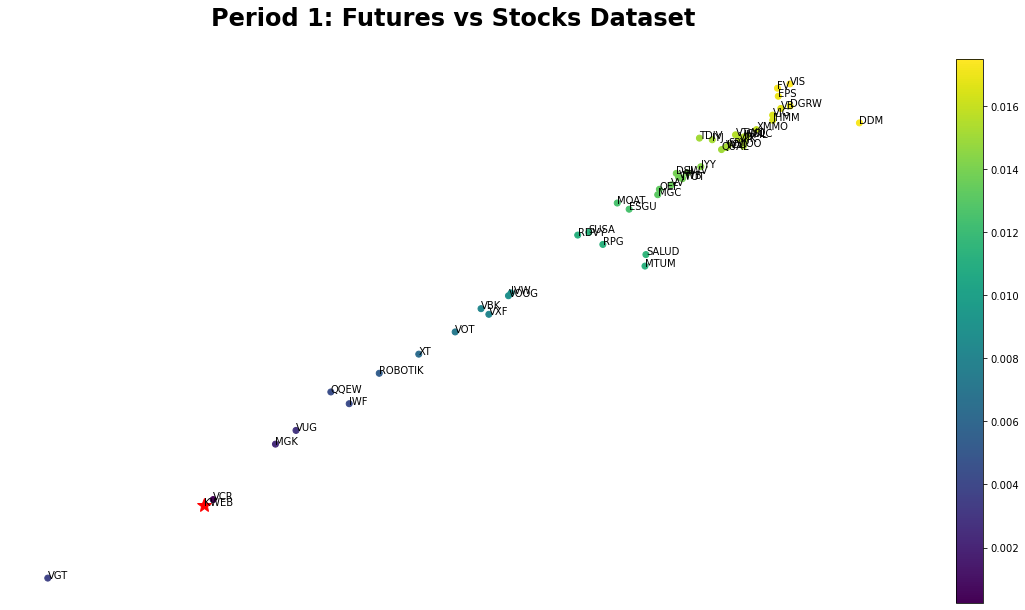

In [824]:
x_i = closest_points_top50['x']#*1000
y_i = closest_points_top50['y']#*100
d_i = closest_points_top50['Distance']
ticker_i = closest_points_top50['Ticker']
fig, ax = plt.subplots(figsize=(20, 10))
im = ax.scatter(x_i, y_i, c = d_i, cmap = 'viridis')
plt.plot(ref_point[0], ref_point[1],'r*', markersize = 15)
ax.annotate('KWEB',(ref_point[0], ref_point[1]))
plt.colorbar(im, ax=ax)
plt.axis('off')
ax.set_title('Period 1: Futures vs Stocks Dataset\n', fontsize = 24, fontweight='bold')
for i, txt in enumerate(ticker_i):
    ax.annotate(txt, (x_i[i], y_i[i]))

# Índice

Usaremos el proceso descrito anteriormente para crear un índice. Debido a la aleatoriedad del modelo VAE, no obtendremos la misma lista exacta de las 50 principales acciones en cada ejecución.

Para asegurarnos de obtener una representación justa de los 50 puntos más cercanos, ejecutaremos el modelo VAE 10 veces (reinicializándolo y reentrenándolo en cada ejecución). Luego, tomaremos los 50 puntos más cercanos encontrados en cada ejecución para crear un marco de datos más cercano_puntos_df marco de datos de longitud 500.

In [836]:
from datetime import date
today = date.today()
today_string = str(today.year)+str(today.month)+str(today.day)
n_trials = 5
path='/Users/CarlosCarrasco/Downloads/'

In [837]:
# network parameters
original_dim = x_train.shape[1]
input_shape = (original_dim, )
intermediate_dim = 300
batch_size = 128
latent_dim = 2
epochs = 10

In [838]:
stock_data_pct_change = stock_data.pct_change()
stock_data_pct_change.dropna(inplace = True)
kweb=stock_data_pct_change[["KWEB"]]
stock_data_pct_change=stock_data_pct_change.drop(["KWEB"],axis=1)
stock_data_pct_change=stock_data_pct_change.iloc[:,:100]
geoMA_5d_stocks = pd.DataFrame(columns = stock_data_pct_change.columns, index = stock_data_pct_change.index)
d = 5
for i in range(len(geoMA_5d_stocks.columns)):
    for j in range(d,len(geoMA_5d_stocks)):
        mult = 1
        for k in range(1,1+d):
            mult = mult * (stock_data_pct_change.loc[stock_data_pct_change.index[j-k]][geoMA_5d_stocks.columns[i]]+1)
            geoMA_5d_stocks.loc[geoMA_5d_stocks.index[j]][geoMA_5d_stocks.columns[i]] = np.power(mult,1/d)

geoMA_5d_stocks.dropna(inplace=True)
geoMA_5d_stocks_T=geoMA_5d_stocks.T
# Divide in two
geoMA_5d_stocks_p1 = geoMA_5d_stocks.head(int(len(geoMA_5d_stocks)/2))
geoMA_5d_stocks_p2 = geoMA_5d_stocks.tail(int(len(geoMA_5d_stocks)/2))# Transpose the dataframe for period 1


geoMA_5d_stocks_p1_T = geoMA_5d_stocks_p1.T
n_simpath_per_ticker = 100
n_tickers_selected = 100


for indice_guardar in range(n_trials): # Create the VAE model and get the predictions n_trials(=10) times.



    random_tickers_selected = np.random.choice(len(geoMA_5d_stocks_p1_T), n_tickers_selected)
    n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker

    sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))
    for i in range(len(random_tickers_selected)):
        random_index = random_tickers_selected[i]
        rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_p1_T.iloc[random_index].values.astype(np.float64)))
        for j in range(n_simpath_per_ticker):
            sim_path = np.zeros(len(geoMA_5d_stocks_p1_T.iloc[random_index]))
            sim_path[0] = geoMA_5d_stocks_p1_T.iloc[random_index][0]
            for k in range(1,len(sim_path)):
                sim_path[k] = sim_path[0]*np.exp(rd_stock_logReturns[np.random.randint(0, len(rd_stock_logReturns))])
            sim_paths_matrix[i*100+j] = sim_path
    shuffled_array = np.random.permutation(sim_paths_matrix)    
    #Vamos a separar los datos simulados en train y test
    x_train = shuffled_array[0:8000]
    x_test = shuffled_array[8000:]
    original_dim = x_train.shape[1]
    input_shape = (original_dim, )
    intermediate_dim = 300
    batch_size = 128
    latent_dim = 2
    epochs = 10
    inputs = Input(shape=input_shape, name='encoder_input')
    x = Dense(intermediate_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)
    def sampling(args):
        """Truco de reparametrización para muestrear
        de una gausiana unitaria
         # Argumentos
         arg(tensor): mean y log de la variance of Q(z|x)

         #Returns
         z(tensor): vector latente muestreado
         """

        z_mean, z_log_var = args

        batch = K.shape(z_mean)[0]
        dim = K.int_shape(z_mean)[1]

        epsilon = K.random_normal(shape=(batch, dim))
        return z_mean + K.exp(0.5 * z_log_var) * epsilon
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
    encoder = Model(inputs, z_mean)
    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = Dense(intermediate_dim, activation='relu')(latent_inputs)
    outputs = Dense(original_dim, activation='sigmoid')(x)
    decoder = Model(latent_inputs, outputs, name='decoder')
    outputs = decoder(encoder(inputs))
    vae = Model(inputs, outputs, name='vae_mlp')
    def sen_loss(encoder_inputs, decoder_outputs):
        sl = losses.binary_crossentropy(encoder_inputs, decoder_outputs)
        return K.sum(sl, axis=-1)
    def kl_loss(z_mean, z_log_var):
        return - 0.5 * K.mean(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var))
    optimizer = Adam(learning_rate=0.01)
    vae.compile(optimizer=optimizer, loss=[sen_loss, kl_loss], loss_weights=[1.,1.])
    results = vae.fit(x_train, x_train,
            shuffle=True,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test, x_test))
    stock_data_pct_change_new=kweb
    geoMA_5d_stocks_new = pd.DataFrame(columns = stock_data_pct_change_new.columns, index = stock_data_pct_change_new.index)
    d = 5
    for i in range(len(geoMA_5d_stocks_new.columns)):
        for j in range(d,len(geoMA_5d_stocks_new)):
            mult = 1
            for k in range(1,1+d):
                mult = mult * (stock_data_pct_change_new.loc[stock_data_pct_change_new.index[j-k]][geoMA_5d_stocks_new.columns[i]]+1)
                geoMA_5d_stocks_new.loc[geoMA_5d_stocks_new.index[j]][geoMA_5d_stocks_new.columns[i]] = np.power(mult,1/d)

    geoMA_5d_stocks_p1_new = geoMA_5d_stocks_new.head(int(len(geoMA_5d_stocks_new)/2))
    geoMA_5d_stocks_p2_new = geoMA_5d_stocks_new.tail(int(len(geoMA_5d_stocks_new)/2))# Transpose the dataframe for period 1
    geoMA_5d_stocks_p1_T_new = geoMA_5d_stocks_p1_new.T


    dataframe_to_test_p1 = geoMA_5d_stocks_p1.join(geoMA_5d_stocks_p1_new).fillna(1)
    matrix_to_test_p1 = dataframe_to_test_p1.T.values


    encoded_p1 = encoder.predict(matrix_to_test_p1, batch_size=batch_size)
    # Convert the predictions into a dataframe
    encoded_p1_df = pd.DataFrame(data = encoded_p1, columns = ['x','y'], index = dataframe_to_test_p1.T.index)
    ref_point = encoded_p1_df.loc['KWEB'].values
    encoded_p1_df['Distance'] = scipy.spatial.distance.cdist([ref_point], encoded_p1_df, metric='euclidean')[0]
    closest_points = encoded_p1_df.sort_values('Distance', ascending = True)
    closest_points_top50 = closest_points.head(51)[1:] #We take head(51), because the Futures reference point is the first entry
    closest_points_top50['Ticker'] = closest_points_top50.index
    
    #Guardamos los primeros 50 puntos de la corrida actual
    loop_currentfilename = path + 'Futures_vs_stocks_period1_'+today_string+'_trial_'+str(indice_guardar+1)+'.xlsx'

    
    closest_points_top50.to_excel(loop_currentfilename)   
    

Epoch 1/10
63/63 [==============================] - 1s 6ms/step - loss: 6.4766 - val_loss: 1.2005
Epoch 2/10
63/63 [==============================] - 0s 6ms/step - loss: 1.2604 - val_loss: 1.1985
Epoch 3/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2592 - val_loss: 1.1978
Epoch 4/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2600 - val_loss: 1.2000
Epoch 5/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2603 - val_loss: 1.2081
Epoch 6/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2609 - val_loss: 1.2001
Epoch 7/10
63/63 [==============================] - 0s 6ms/step - loss: 1.2612 - val_loss: 1.2063
Epoch 8/10
63/63 [==============================] - 0s 6ms/step - loss: 1.2597 - val_loss: 1.2005
Epoch 9/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2609 - val_loss: 1.1999
Epoch 10/10
63/63 [==============================] - 0s 5ms/step - loss: 1.2597 - val_loss: 1.1981
Epoch 1/10
63/63 [=

In [839]:
'''
for indice_guardar in range(n_trials): # Create the VAE model and get the predictions n_trials(=10) times.
    
    
    #n_simpath_per_ticker = 100
    #n_tickers_selected = 100
    #random_tickers_selected = np.random.choice(len(geoMA_5d_stocks_p1_T), n_tickers_selected)
    #n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker

    #sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))


    
    n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker
    sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))
    
    
    #Simulamos paths
    for i in range(len(random_tickers_selected)):
        random_index = random_tickers_selected[i]
        rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_p1_T.iloc[random_index].values.astype(np.float64)))
        #rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_T.iloc[random_index]))
        for j in range(n_simpath_per_ticker):
            sim_path = np.zeros(len(geoMA_5d_stocks_p1_T.iloc[random_index]))
            sim_path[0] = geoMA_5d_stocks_p1_T.iloc[random_index][0]
            for k in range(1,len(sim_path)):
                sim_path[k] = sim_path[0]*np.exp(rd_stock_logReturns[np.random.randint(0, len(rd_stock_logReturns))])
            sim_paths_matrix[i*100+j] = sim_path  
    #Cambiamos orden de filar
    shuffled_array = np.random.permutation(sim_paths_matrix)# Split the simulated time series into a training and test set
    x_train = shuffled_array[0:8000]
    x_test = shuffled_array[8000:]
    
    #Hacemos modelo
    inputs = Input(shape=input_shape, name='encoder_input')
    x = Dense(intermediate_dim, activation='relu')(inputs)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log_var = Dense(latent_dim, name='z_log_var')(x)
    z = Lambda(sampling, output_shape=(latent_dim,), name='z')([z_mean, z_log_var])
    encoder = Model(inputs, z_mean)

    latent_inputs = Input(shape=(latent_dim,), name='z_sampling')
    x = Dense(intermediate_dim, activation='relu')(latent_inputs)
    outputs = Dense(original_dim, activation='sigmoid')(x)

    decoder = Model(latent_inputs, outputs, name='decoder')

    outputs = decoder(encoder(inputs))
    vae = Model(inputs, outputs, name='vae_mlp')
    vae.compile(optimizer=optimizer, loss=[sen_loss, kl_loss], loss_weights=[1.,1.])

    #entrenamos modelo
    results = vae.fit(x_train, x_train,
            shuffle=True,
            epochs=epochs,
            batch_size=batch_size,
            validation_data=(x_test, x_test))   
    
    dataframe_to_test_p1 = geoMA_5d_stocks_p1.join(geoMA_5d_stocks_p1_new).fillna(1)
    matrix_to_test_p1 = dataframe_to_test_p1.T.values

    #predicción
    encoded_p1 = encoder.predict(matrix_to_test_p1, batch_size=batch_size)
    
    encoded_p1_df = pd.DataFrame(data = encoded_p1, columns = ['x','y'], index = dataframe_to_test_p1.T.index)
    ref_point = encoded_p1_df.loc['KWEB'].values
    #cityblock
    #encoded_p1_df['Distance'] = scipy.spatial.distance.cdist([ref_point], encoded_p1_df, metric='cityblock')[0]
    
    encoded_p1_df['Distance'] = scipy.spatial.distance.cdist([ref_point], encoded_p1_df, metric='euclidean')[0]
    closest_points = encoded_p1_df.sort_values('Distance', ascending = True)
    closest_points_top50 = closest_points.head(51)[1:] #51 por el punto de referencia
    closest_points_top50['Ticker'] = closest_points_top50.index
    
    
    #Guardamos los primeros 50 puntos de la corrida actual
    loop_currentfilename = path + 'Futures_vs_stocks_period1_'+today_string+'_trial_'+str(indice_guardar+1)+'.xlsx'

    
    closest_points_top50.to_excel(loop_currentfilename)
    
''' 
    

"\nfor indice_guardar in range(n_trials): # Create the VAE model and get the predictions n_trials(=10) times.\n    \n    \n    #n_simpath_per_ticker = 100\n    #n_tickers_selected = 100\n    #random_tickers_selected = np.random.choice(len(geoMA_5d_stocks_p1_T), n_tickers_selected)\n    #n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker\n\n    #sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))\n\n\n    \n    n_rows_sim_paths_matrix = n_tickers_selected * n_simpath_per_ticker\n    sim_paths_matrix  = np.zeros((n_rows_sim_paths_matrix, len(geoMA_5d_stocks_p1_T.iloc[0])))\n    \n    \n    #Simulamos paths\n    for i in range(len(random_tickers_selected)):\n        random_index = random_tickers_selected[i]\n        rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_p1_T.iloc[random_index].values.astype(np.float64)))\n        #rd_stock_logReturns = np.diff(np.log(geoMA_5d_stocks_T.iloc[random_index]))\n        for j in range(n_simp

In [840]:
results_df = pd.DataFrame()
for f in range(n_trials):
    print(f)
    path = '/Users/CarlosCarrasco/Downloads/'+'Futures_vs_stocks_period1_'+today_string+'_trial_'+str(f+1)+'.xlsx'
    data = pd.read_excel(path)
    results_df = results_df.append(data)

    

0
1
2
3
4


/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/1627451476.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(data)
/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/1627451476.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(data)
/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/1627451476.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_df.append(data)
/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/1627451476.py:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  results_df = results_

In [841]:
results_df.head()

,Unnamed: 0,x,y,Distance,Ticker
0,VBK,-0.258354,18.375254,0.001875,VBK
1,VOT,-0.258087,18.375307,0.001967,VOT
2,IWF,-0.257337,18.377861,0.002094,IWF
3,QQEW,-0.257463,18.375343,0.002354,QQEW
4,MTUM,-0.257915,18.374876,0.002421,MTUM


In [844]:
len(results_df)

250

In [845]:
sorted_by_dist = results_df.sort_values('Distance', ascending = True)

In [846]:
sorted_by_dist.head()


,Unnamed: 0,x,y,Distance,Ticker
0,MGK,-27.381613,0.299195,0.000474,MGK
1,VUG,-27.380915,0.299181,0.001031,VUG
0,VGT,-13.219051,-35.257339,0.001310,VGT
0,VCR,16.936241,20.494442,0.001529,VCR
0,VBK,-0.258354,18.375254,0.001875,VBK


In [847]:
len(sorted_by_dist)

250

In [848]:
sorted_by_dist.drop_duplicates(subset='Ticker', keep='first', inplace = True)

In [849]:
len(sorted_by_dist)

54

In [850]:
sorted_by_dist

,Unnamed: 0,x,y,Distance,Ticker
0,MGK,-27.381613,0.299195,0.000474,MGK
1,VUG,-27.380915,0.299181,0.001031,VUG
0,VGT,-13.219051,-35.257339,0.001310,VGT
0,VCR,16.936241,20.494442,0.001529,VCR
0,VBK,-0.258354,18.375254,0.001875,VBK
1,VOT,-0.258087,18.375307,0.001967,VOT
2,IWF,-27.379816,0.299120,0.002081,IWF
3,QQEW,-0.257463,18.375343,0.002354,QQEW
4,MTUM,-0.257915,18.374876,0.002421,MTUM
6,VOOG,-0.257650,18.374842,0.002600,VOOG


In [851]:
closest_points_top50 = sorted_by_dist.head(51)[1:] #51 por el punto de referencia
#closest_points_top50['Ticker'] = closest_points_top50.index


In [852]:
closest_points_top50

,Unnamed: 0,x,y,Distance,Ticker
1,VUG,-27.380915,0.299181,0.001031,VUG
0,VGT,-13.219051,-35.257339,0.001310,VGT
0,VCR,16.936241,20.494442,0.001529,VCR
0,VBK,-0.258354,18.375254,0.001875,VBK
1,VOT,-0.258087,18.375307,0.001967,VOT
2,IWF,-27.379816,0.299120,0.002081,IWF
3,QQEW,-0.257463,18.375343,0.002354,QQEW
4,MTUM,-0.257915,18.374876,0.002421,MTUM
6,VOOG,-0.257650,18.374842,0.002600,VOOG
8,IVW,-0.257633,18.374699,0.002726,IVW


In [853]:
#Calcular los pesos de nueso índice
top50 = closest_points_top50.head(50)

In [854]:
top50

,Unnamed: 0,x,y,Distance,Ticker
1,VUG,-27.380915,0.299181,0.001031,VUG
0,VGT,-13.219051,-35.257339,0.001310,VGT
0,VCR,16.936241,20.494442,0.001529,VCR
0,VBK,-0.258354,18.375254,0.001875,VBK
1,VOT,-0.258087,18.375307,0.001967,VOT
2,IWF,-27.379816,0.299120,0.002081,IWF
3,QQEW,-0.257463,18.375343,0.002354,QQEW
4,MTUM,-0.257915,18.374876,0.002421,MTUM
6,VOOG,-0.257650,18.374842,0.002600,VOOG
8,IVW,-0.257633,18.374699,0.002726,IVW


In [855]:
top50['Weight'] = (1/top50['Distance'])/np.sum(1/top50['Distance'])

/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/2575784382.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50['Weight'] = (1/top50['Distance'])/np.sum(1/top50['Distance'])


In [856]:
top50

,Unnamed: 0,x,y,Distance,Ticker,Weight
1,VUG,-27.380915,0.299181,0.001031,VUG,0.082201
0,VGT,-13.219051,-35.257339,0.001310,VGT,0.064699
0,VCR,16.936241,20.494442,0.001529,VCR,0.055417
0,VBK,-0.258354,18.375254,0.001875,VBK,0.045188
1,VOT,-0.258087,18.375307,0.001967,VOT,0.043075
2,IWF,-27.379816,0.299120,0.002081,IWF,0.040714
3,QQEW,-0.257463,18.375343,0.002354,QQEW,0.035994
4,MTUM,-0.257915,18.374876,0.002421,MTUM,0.034991
6,VOOG,-0.257650,18.374842,0.002600,VOOG,0.032584
8,IVW,-0.257633,18.374699,0.002726,IVW,0.031083


In [857]:
stock_data

,ESCALA,ACTICOB,ACTOTAL,ACTI500,ESFERA,ROBOTIK,DINAMO,SNX,SALUD,SPY,...,FINX,SNSR,AUSF,AIQ,CTEC,GNOM,MILN,KRMA,BUG,HERO
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-20,147.588331,126.762168,125.244007,172.936392,161.980193,156.304451,126.214699,165.718941,332.826252,266.877563,...,25.782167,18.503429,21.631054,15.456390,6.519350,14.940984,23.168114,20.084255,15.714588,13.903992
2019-03-21,147.569699,126.156691,124.645782,173.966543,162.945080,157.235528,126.153717,166.426249,332.513981,269.891815,...,26.146494,18.697380,21.847540,15.781271,6.571389,15.203976,23.587690,20.259773,15.966695,14.101858
2019-03-22,147.862631,126.304306,124.791629,170.853872,160.029608,154.422214,125.339409,163.622416,326.906556,264.697388,...,25.559784,18.013662,21.531826,15.426856,6.371486,14.532434,23.032215,19.894346,15.545160,13.748743
2019-03-25,148.105682,126.041028,124.531504,170.320519,159.530045,153.940156,125.026141,163.370488,325.978594,264.498322,...,25.323206,17.807961,21.513786,15.350066,6.330237,14.553935,23.176043,19.863653,15.490766,13.739515
2019-03-26,148.105682,126.299866,124.787242,171.884708,160.995137,155.353911,125.639479,164.499426,328.852315,266.469940,...,25.890993,17.871634,21.712236,15.397323,6.314371,14.840087,23.239527,20.003685,15.569635,13.836622
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-08-25,149.445584,120.978704,121.291913,264.272986,169.117934,208.273073,134.863683,216.124910,515.139259,419.510010,...,24.940001,29.200001,31.230000,22.850000,17.049999,15.030000,30.170000,29.920000,28.350000,21.370001
2022-08-26,149.924868,121.410395,121.554123,256.332587,164.913337,201.040540,133.762202,209.204579,502.960677,405.309998,...,23.840000,28.020000,30.730000,22.070000,16.790001,14.150000,28.950001,28.799999,27.670000,20.879999
2022-08-29,149.514939,121.151217,121.282976,254.108305,162.590930,196.859100,132.964636,207.446935,496.970166,402.630005,...,23.639999,27.900000,30.670000,21.780001,16.525000,13.910000,28.790001,28.639999,27.299999,20.719999


In [858]:
#Nos tramemos los precios de las top50
stock_data_top50 = stock_data[top50['Ticker']]

In [859]:
stock_data_top50.head()

,VUG,VGT,VCR,VBK,VOT,IWF,QQEW,MTUM,VOOG,IVW,...,VB,VTWO,JHMM,TDIV,VT,EPS,IYJ,ACWI,VIG,DGRW
Fecha,,,,,,,,,,,,,,,,,,,,,
2019-03-20,151.878357,192.844238,162.989655,176.426270,137.957260,146.712799,63.034939,107.403870,149.023376,41.451519,...,145.656845,59.180168,33.662933,35.483059,68.588707,29.773296,72.090591,67.619354,101.831139,39.609470
2019-03-21,154.098297,197.649719,165.181946,179.387360,140.432144,148.867477,64.034485,108.565216,150.753647,41.932995,...,147.669525,59.942635,34.136375,36.108742,68.997681,30.119497,72.973824,68.096077,103.069450,40.138206
2019-03-22,150.768417,192.628006,161.657425,173.494675,137.301865,145.640320,62.555859,107.336121,147.921402,41.166031,...,143.119537,57.789490,33.334419,35.402180,67.594139,29.464523,71.212212,66.684624,101.390244,39.433239
2019-03-25,150.729462,191.842743,162.548157,173.868515,137.282318,145.640320,62.467144,107.452263,148.199631,41.228939,...,143.377090,58.008965,33.315098,35.188351,67.576408,29.436451,71.361824,66.675270,101.380859,39.442509
2019-03-26,151.615494,192.957626,163.304749,175.521225,138.280075,146.342331,62.920597,108.158745,149.188416,41.521690,...,144.922348,58.652496,33.595295,35.495144,67.977646,29.629034,71.979584,67.133293,102.243904,39.716694


In [860]:
#Vamos a traernos una fecha
Mar28_2019_stockPrice = np.zeros(len(stock_data_top50.columns))
for i in range(len(Mar28_2019_stockPrice)):
    if stock_data_top50.columns[i] == top50['Ticker'].iloc[i]:
        Mar28_2019_stockPrice[i] = stock_data_top50[stock_data_top50.columns[i]].iloc[0]


In [861]:
top50['Price Mar28_2019'] = Mar28_2019_stockPrice

/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/780345701.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50['Price Mar28_2019'] = Mar28_2019_stockPrice


In [862]:
top50

,Unnamed: 0,x,y,Distance,Ticker,Weight,Price Mar28_2019
1,VUG,-27.380915,0.299181,0.001031,VUG,0.082201,151.878357
0,VGT,-13.219051,-35.257339,0.001310,VGT,0.064699,192.844238
0,VCR,16.936241,20.494442,0.001529,VCR,0.055417,162.989655
0,VBK,-0.258354,18.375254,0.001875,VBK,0.045188,176.426270
1,VOT,-0.258087,18.375307,0.001967,VOT,0.043075,137.957260
2,IWF,-27.379816,0.299120,0.002081,IWF,0.040714,146.712799
3,QQEW,-0.257463,18.375343,0.002354,QQEW,0.035994,63.034939
4,MTUM,-0.257915,18.374876,0.002421,MTUM,0.034991,107.403870
6,VOOG,-0.257650,18.374842,0.002600,VOOG,0.032584,149.023376
8,IVW,-0.257633,18.374699,0.002726,IVW,0.031083,41.451519


In [863]:
#Vamos a hacer un potafolio
net_assets=10_000_000 #net de 10 million
numShares = np.zeros(len(stock_data_top50.columns))
for i in range(len(Mar28_2019_stockPrice)):
    if stock_data_top50.columns[i] == top50['Ticker'].iloc[i]:
        numShares[i] = int(net_assets*top50['Weight'].iloc[i]/top50['Price Mar28_2019'].iloc[i])
        
top50['numShares'] = numShares


/var/folders/l4/2v8p87cj6db5_9x0gr5_btbh0000gn/T/ipykernel_60339/2265881687.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top50['numShares'] = numShares


In [864]:
top50.head()

,Unnamed: 0,x,y,Distance,Ticker,Weight,Price Mar28_2019,numShares
1,VUG,-27.380915,0.299181,0.001031,VUG,0.082201,151.878357,5412.0
0,VGT,-13.219051,-35.257339,0.001310,VGT,0.064699,192.844238,3354.0
0,VCR,16.936241,20.494442,0.001529,VCR,0.055417,162.989655,3400.0
0,VBK,-0.258354,18.375254,0.001875,VBK,0.045188,176.426270,2561.0
1,VOT,-0.258087,18.375307,0.001967,VOT,0.043075,137.957260,3122.0


In [865]:
stock_index = np.zeros(len(stock_data_top50))
for i in range(len(stock_data_top50)):
    sum_num = 0
    sum_denom = 0
    for j in range(len(stock_data_top50.columns)):
        sum_num = sum_num + stock_data_top50[stock_data_top50.columns[j]].iloc[i]*top50['numShares'].iloc[j]
        sum_denom = sum_denom + stock_data_top50[stock_data_top50.columns[j]].iloc[0]*top50['numShares'].iloc[j]

    stock_index[i] = sum_num /sum_denom

In [866]:
stock_index_df = pd.DataFrame(stock_index*100, columns =  ['stock_index'], index = stock_data_top50.index)

<AxesSubplot:xlabel='Fecha'>

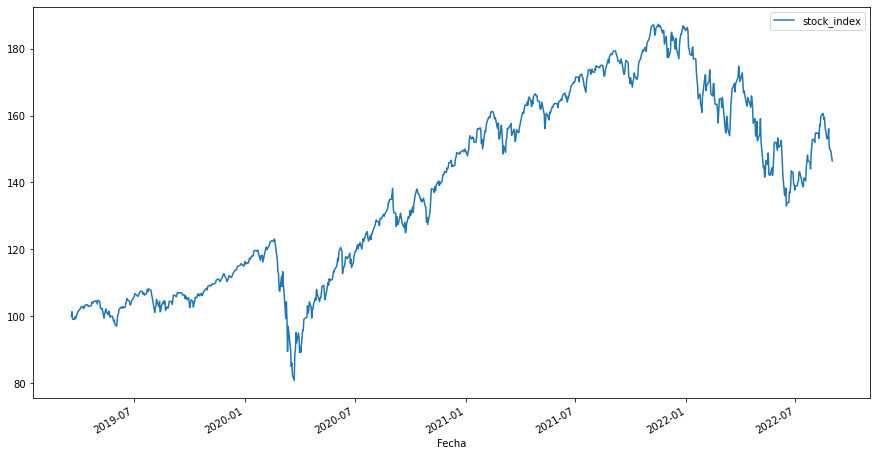

In [867]:
stock_index_df.plot(figsize=(15,8))

In [868]:
kweb

,KWEB
Fecha,
2019-03-21,0.005412
2019-03-22,-0.034022
2019-03-25,0.008694
2019-03-26,-0.001768
2019-03-27,0.003985
...,...
2022-08-25,0.073059
2022-08-26,-0.010147
2022-08-29,-0.018188


In [869]:
len(stock_index)

872

In [870]:
len(kweb)

871

In [871]:
futures_theoretical = np.zeros(len(stock_index_df))
futures_theoretical[0] = stock_index_df.iloc[0]
for i in range(len(futures_theoretical)-1):
      futures_theoretical[i+1] = (1+kweb.iloc[i])*futures_theoretical[i]


In [872]:
stock_index_df['KWEB'] = futures_theoretical

In [873]:
stock_index_df.head()

,stock_index,KWEB
Fecha,,
2019-03-20,100.000000,100.000000
2019-03-21,101.354672,100.541236
2019-03-22,99.104519,97.120589
2019-03-25,99.085719,97.964926
2019-03-26,99.801206,97.791723


<AxesSubplot:xlabel='Fecha'>

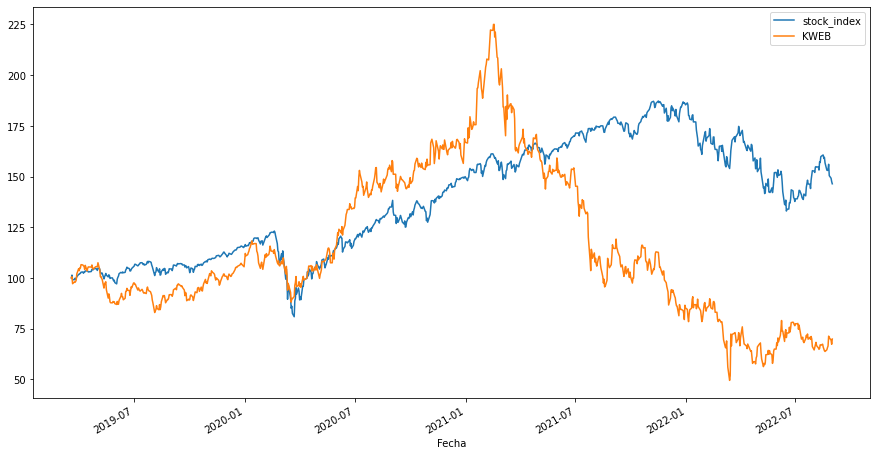

In [874]:
stock_index_df.plot(figsize=(15,8))

Nuestro índice tiene prácticamente la misma tendencia que los datos de futuros de referencia, excepto por la segunda mitad de 2021. No filtramos las acciones en busca de valores atípicos y límites de capitalización de mercado. Además, no hubo rebalanceos a lo largo de los dos períodos de tiempo observados e ignoramos las distribuciones.

Creemos que el uso de codificadores automáticos variacionales para construir un índice puede acelerar el desarrollo de nuevos índices en un mercado de valores con el que los analistas pueden no estar familiarizados. Además, podría ayudar a crear aún más índices de nicho para ser utilizados por los ETF o incluso nuevas posibilidades de inversión creativa para empresas de indexación directa en todo el mundo. 